In [1]:
import numpy as np
import matplotlib.pyplot as plt
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()
with open(path) as f:
    l = f.readlines()
S = l.index('Nodes:\n')
E = l.index('Publishers:\n')
no=[]
for i in l[S+3:E-1]:
    no.append(i.split()[4])
print(no)
n= ['point_cloud_fusion_nodes', 'voxel_grid_cloud_node', 'p2d_ndt_localizer_node', 'behavior_planner_node', 
    'mpc_controller_node', 'lanelet2_global_planner_node', 'robot_state_publisher', 'parking_planner_node',
   'ndt_map_publisher_node', 'ray_ground_classifier', 'lgsvl_interface_node',]

['robot_state_publisher', 'lgsvl_interface_node', 'mpc_controller_node', 'filter_transform_vlp16_front', 'filter_transform_vlp16_rear', 'ndt_map_publisher_node', 'ray_ground_classifier', 'euclidean_cluster_cloud_node', 'voxel_grid_cloud_node', 'point_cloud_fusion_nodes', 'transform_listener_impl_5643c5d4b410', 'lane_planner_node', 'parking_planner_node', 'lanelet2_map_provider_node', 'p2d_ndt_localizer_node', 'lanelet2_map_visualizer_node', 'transform_listener_impl_562ede6d8e00', 'behavior_planner_node', 'object_collision_estimator_node', 'off_map_obstacles_filter_node', 'lanelet2_global_planner_node', 'transform_listener_impl_55d80f842250', 'rviz2', 'rosbridge_server_node', 'transform_listener_impl_5648ff3d7c50', 'transform_listener_impl_5648fe7fd6d0']


voxel_grid_cloud_node 93833699977776
pub: ['rosout', 'parameter_events', 'lidars/points_fused_downsampled']
sub: ['parameter_events', 'lidars/points_fused']
93833701959280       1628738367100397181   93833699977776   93833702103392                               /lidars/points_fused    10

93833702097152
93833702097376
607 7530.846 656.902


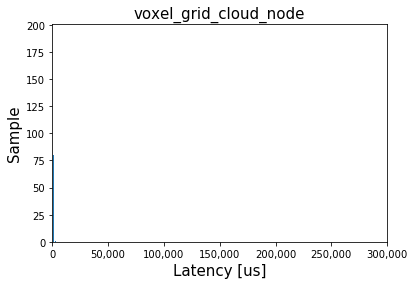

In [5]:
#voxel_grid_cloud_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[1] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[1],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[1].split()[0]
print(subt[1])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

S4 = l.index('Callback symbols:\n')
E4 = l.index('Callback instances:\n')  
cb1_name = [line for line in l[S4:E4] if callback_object in line]
cb1_name = ''.join(cb1_name)
cb1_name = cb1_name.split()[2]+cb1_name.split()[3]
#print(cb1_name)

cb1d = []
for i in l_XXX:
    #print(i)
    cb1d.append(int(i.split()[3])) 
cb1d_us = []
for i in cb1d:
    cb1d_us.append(i/1000)
print(len(cb1d_us),max(cb1d_us),min(cb1d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb1d_us, bins=100)
plt.title("voxel_grid_cloud_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.savefig("voxel_grid_cloud_node.pdf")
plt.xlim(0,300000)
plt.savefig("voxel_grid_cloud_node300000.pdf")

0x55575C7B41E0
607 3779.027 113.043


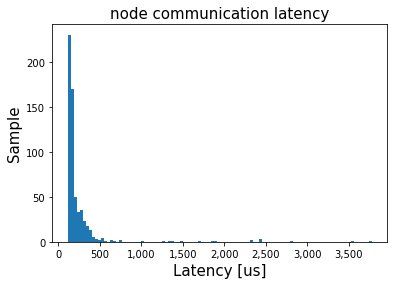

In [6]:
#calculate the voxel_grid_cloud_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com1_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com1_latency_ns.append(com)

com1_latency_us = []
for i in com1_latency_ns:
    com1_latency_us.append(i/1000)
print(len(com1_latency_us),max(com1_latency_us),min(com1_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com1_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("voxel_grid_cloud_node_com.pdf")

p2d_ndt_localizer_node 93878629171312
pub: ['rosout', 'parameter_events', 'localization/ndt_pose', 'lidars/points_fused_viz', 'tf']
sub: ['parameter_events', 'tf', 'tf_static', 'lidars/points_fused_downsampled', 'localization/ndt_map', 'localization/initialpose']
93878631490720       1628738367235759012   93878629171312   93878631590704                   /lidars/points_fused_downsampled    10

93878631492656
93878631492880
597 313697.255 304.184


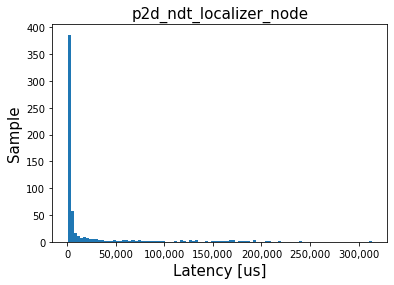

In [7]:
#p2d_ndt_localizer_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[2] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[2],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[3].split()[0]
print(subt[3])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

S4 = l.index('Callback symbols:\n')
E4 = l.index('Callback instances:\n')  
cb2_name = [line for line in l[S4:E4] if callback_object in line]
cb2_name = ''.join(cb2_name)
#cb2_name = cb2_name.split()[2]
#print(cb1_name)

cb2d = []
for i in l_XXX:
    #print(i)
    cb2d.append(int(i.split()[3])) 
cb2d_us = []
for i in cb2d:
    cb2d_us.append(i/1000)
print(len(cb2d_us),max(cb2d_us),min(cb2d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb2d_us, bins=100)
plt.title("p2d_ndt_localizer_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("p2d_ndt_localizer_node.pdf")

0x5561D27B6D10
597 4167.728 79.832


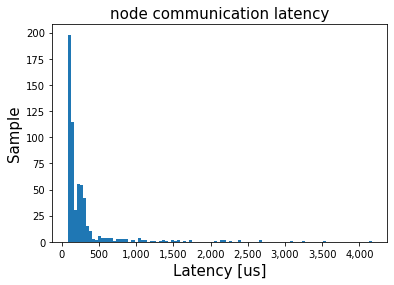

In [8]:
#calculate the p2d_ndt_localizer_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com2_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com2_latency_ns.append(com)

com2_latency_us = []
for i in com2_latency_ns:
    com2_latency_us.append(i/1000)
print(len(com2_latency_us),max(com2_latency_us),min(com2_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com2_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("p2d_ndt_localizer_node_com.pdf")

behavior_planner_node 94288586914896
pub: ['rosout', 'parameter_events', 'planning/trajectory', 'planning/debug/full_trajectory', 'planning/debug/checkpoints', 'planning/debug/current_subroute', 'vehicle/state_command']
sub: ['parameter_events', 'tf', 'tf_static', 'planning/plan_lane_trajectory/_action/feedback', 'planning/plan_lane_trajectory/_action/status', 'planning/plan_parking_trajectory/_action/feed...', 'planning/plan_parking_trajectory/_action/status', 'vehicle/vehicle_kinematic_state', 'planning/global_path', 'vehicle/state_report']
94288590328288       1628738368416152908   94288586914896   94288590590304                   /vehicle/vehicle_kinematic_state    10

94288589798768
94288589798992
1645 7248.153 23.442


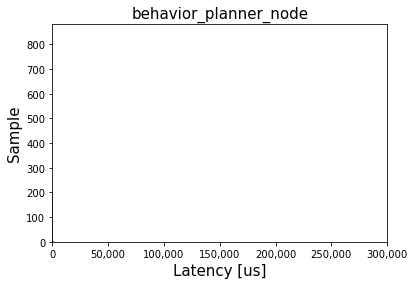

In [11]:
#behavior_planner_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[3] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[3],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[7].split()[0]
print(subt[7])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

S4 = l.index('Callback symbols:\n')
E4 = l.index('Callback instances:\n')  
cb3_name = [line for line in l[S4:E4] if callback_object in line]
cb3_name = ''.join(cb3_name)
cb3_name = cb3_name.split()[2]
#print(cb1_name)

cb3d = []
for i in l_XXX:
    #print(i)
    cb3d.append(int(i.split()[3])) 
cb3d_us = []
for i in cb3d:
    cb3d_us.append(i/1000)
print(len(cb3d_us),max(cb3d_us),min(cb3d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb3d_us, bins=100)
plt.title("behavior_planner_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.savefig("behavior_planner_node.pdf")
plt.xlim(0,300000)
plt.savefig("behavior_planner_node300000.pdf")

0x55C145E6BE50
1645 5812.104 56.842


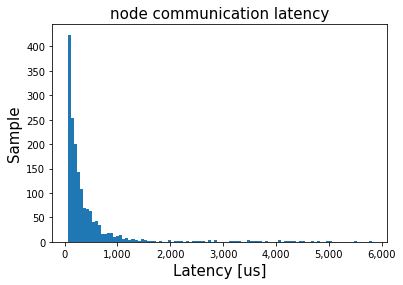

In [12]:
#calculate the behavior_planner_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com3_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com3_latency_ns.append(com)

com3_latency_us = []
for i in com3_latency_ns:
    com3_latency_us.append(i/1000)
print(len(com3_latency_us),max(com3_latency_us),min(com3_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com3_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("behavior_planner_node_com.pdf")

mpc_controller_node 94321481881600
pub: ['rosout', 'parameter_events', 'vehicle/vehicle_command', 'control/control_diagnostic', 'control/mpc_debug_computed_trajectory']
sub: ['parameter_events', 'vehicle/vehicle_kinematic_state', 'planning/trajectory', 'tf', 'tf_static']
94321483756112       1628738366959626711   94321481881600   94321483946368                   /vehicle/vehicle_kinematic_state    10

94321483844480
94321483844704
1634 10409.241 8.896 2350.405401468788


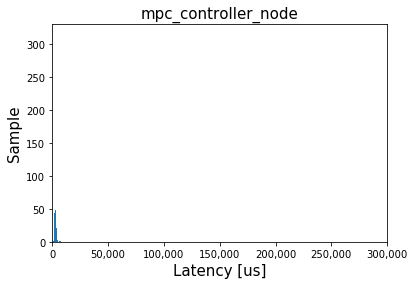

In [14]:
#mpc_controller_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[4] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[4],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[1].split()[0]
print(subt[1])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb4d = []
for i in l_XXX:
    #print(i)
    cb4d.append(int(i.split()[3])) 
cb4d_us = []
for i in cb4d:
    cb4d_us.append(i/1000)
print(len(cb4d_us),max(cb4d_us),min(cb4d_us),np.average(cb4d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb4d_us, bins=100)
plt.title("mpc_controller_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.savefig("mpc_controller_node.pdf")
plt.xlim(0,300000)
plt.savefig("mpc_controller_node300000.pdf")

0x55C8EE8A0C60
1634 6122.253 48.23


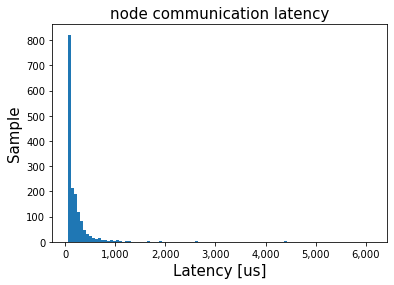

In [9]:
#calculate the mpc_controller_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com4_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com4_latency_ns.append(com)

com4_latency_us = []
for i in com4_latency_ns:
    com4_latency_us.append(i/1000)
print(len(com4_latency_us),max(com4_latency_us),min(com4_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com4_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("mpc_controller_node_com.pdf")

lanelet2_global_planner_node 94261946858768
pub: ['rosout', 'parameter_events', 'planning/global_path']
sub: ['parameter_events', 'tf', 'tf_static', 'planning/goal_pose', 'vehicle/vehicle_kinematic_state']
94261949267696       1628738367347396476   94261946858768   94261949334736                   /vehicle/vehicle_kinematic_state    10

94261949343024
94261949343248
1622 2553.23 35.925


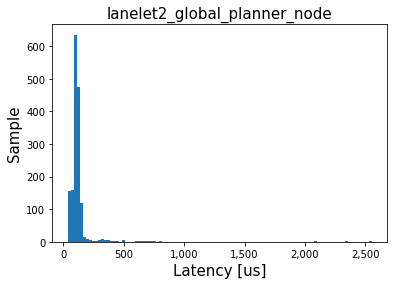

In [10]:
#lanelet2_global_planner_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[5] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[5],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[4].split()[0]
print(subt[4])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb5d = []
for i in l_XXX:
    #print(i)
    cb5d.append(int(i.split()[3])) 
cb5d_us = []
for i in cb5d:
    cb5d_us.append(i/1000)
print(len(cb5d_us),max(cb5d_us),min(cb5d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb5d_us, bins=100)
plt.title("lanelet2_global_planner_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("lanelet2_global_planner_node.pdf")

0x55BB1201A610
1622 7401.727 55.025


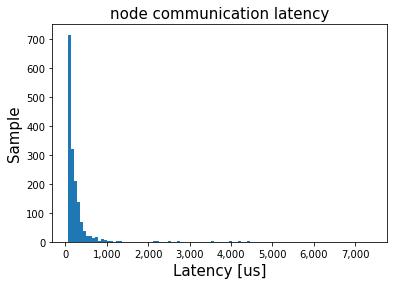

In [11]:
#calculate the lanelet2_global_planner_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com5_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com5_latency_ns.append(com)

com5_latency_us = []
for i in com5_latency_ns:
    com5_latency_us.append(i/1000)
print(len(com5_latency_us),max(com5_latency_us),min(com5_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com5_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("lanelet2_global_planner_node_com.pdf")

robot_state_publisher 94456674260720
pub: ['rosout', 'parameter_events', 'tf', 'tf_static', 'robot_description']
sub: ['parameter_events', 'joint_states']
94456676115856       1628738366906346894   94456674260720   94456676246432                                  /parameter_events  1000

94456676116432
94456676116656
258 125.45 2.917


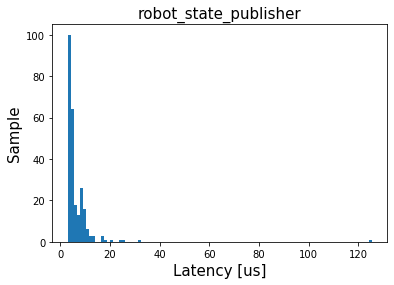

In [12]:
#robot_state_publisher:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[6] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[6],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[0].split()[0]
print(subt[0])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb6d = []
for i in l_XXX:
    #print(i)
    cb6d.append(int(i.split()[3])) 
cb6d_us = []
for i in cb6d:
    cb6d_us.append(i/1000)
print(len(cb6d_us),max(cb6d_us),min(cb6d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb6d_us, bins=100)
plt.title("robot_state_publisher", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("robot_state_publisher.pdf")

0x55E868A068B0
258 5327.402 24.73


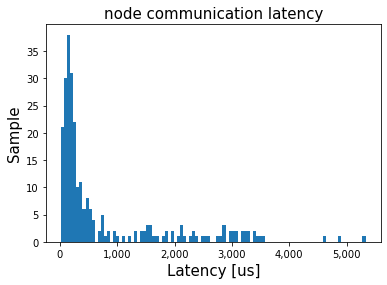

In [13]:
#calculate the robot_state_publisher com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com6_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com6_latency_ns.append(com)

com6_latency_us = []
for i in com6_latency_ns:
    com6_latency_us.append(i/1000)
print(len(com6_latency_us),max(com6_latency_us),min(com6_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com6_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("robot_state_publisher_com.pdf")

parking_planner_node 94815794435504
pub: ['rosout', 'parameter_events', 'planning/plan_parking_trajectory/_action/feed...', 'planning/plan_parking_trajectory/_action/status', 'planning/parking_debug_obstacles', 'planning/parking_debug_trajectory', 'planning/parking_debug_start_end']
sub: ['parameter_events']
94815796211040       1628738367160839382   94815794435504   94815796529232                                  /parameter_events  1000

94815796408000
94815796408224
104 124.512 2.301


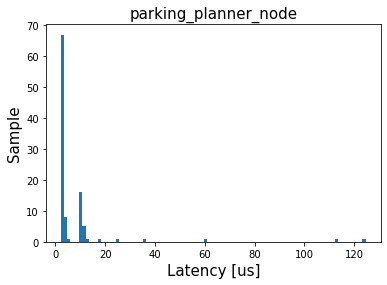

In [14]:
#parking_planner_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[7] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[7],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[0].split()[0]
print(subt[0])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb7d = []
for i in l_XXX:
    #print(i)
    cb7d.append(int(i.split()[3])) 
cb7d_us = []
for i in cb7d:
    cb7d_us.append(i/1000)
print(len(cb7d_us),max(cb7d_us),min(cb7d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb7d_us, bins=100)
plt.title("parking_planner_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("parking_planner_node.pdf")

0x563C05DD2FA0
104 4958.434 28.744


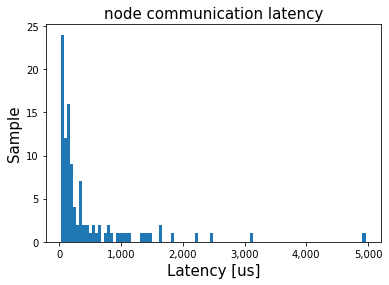

In [15]:
#calculate the parking_planner_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com7_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com7_latency_ns.append(com)

com7_latency_us = []
for i in com7_latency_ns:
    com7_latency_us.append(i/1000)
print(len(com7_latency_us),max(com7_latency_us),min(com7_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com7_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("parking_planner_node_com.pdf")

ndt_map_publisher_node 93913719225184
pub: ['rosout', 'parameter_events', 'localization/ndt_map', 'localization/viz_ndt_map', 'tf_static']
sub: ['parameter_events']
93913721003664       1628738367001587841   93913719225184   93913721269808                                  /parameter_events  1000

93913721127360
93913721127584
167 190.307 2.821


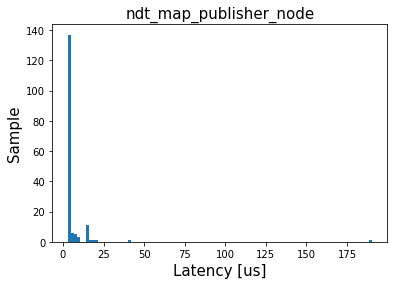

In [16]:
#parking_planner_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[8] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[8],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[0].split()[0]
print(subt[0])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb8d = []
for i in l_XXX:
    #print(i)
    cb8d.append(int(i.split()[3])) 
cb8d_us = []
for i in cb8d:
    cb8d_us.append(i/1000)
print(len(cb8d_us),max(cb8d_us),min(cb8d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb8d_us, bins=100)
plt.title("ndt_map_publisher_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("ndt_map_publisher_node.pdf")

0x5569FDFCC2A0
167 5454.351 32.144


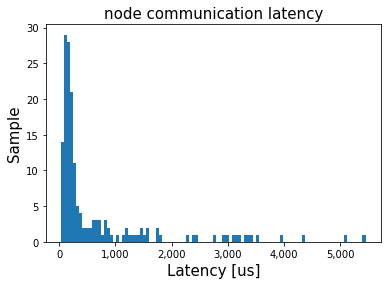

In [17]:
#calculate the ndt_map_publisher_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com8_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com8_latency_ns.append(com)

com8_latency_us = []
for i in com8_latency_ns:
    com8_latency_us.append(i/1000)
print(len(com8_latency_us),max(com8_latency_us),min(com8_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com8_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("ndt_map_publisher_node_com.pdf")

ray_ground_classifier 93883933421840
pub: ['rosout', 'parameter_events', 'perception/points_ground', 'perception/points_nonground']
sub: ['parameter_events', 'lidars/points_fused']
93883940735024       1628738367091779200   93883933421840   93883935530784                               /lidars/points_fused    10

93883940735104
93883940735328
607 7431.587 996.137


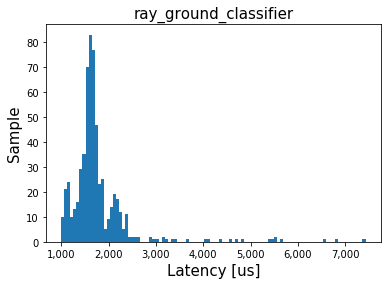

In [18]:
#parking_planner_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[9] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[9],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[1].split()[0]
print(subt[1])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb9d = []
for i in l_XXX:
    #print(i)
    cb9d.append(int(i.split()[3])) 
cb9d_us = []
for i in cb9d:
    cb9d_us.append(i/1000)
print(len(cb9d_us),max(cb9d_us),min(cb9d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb9d_us, bins=100)
plt.title("ray_ground_classifier", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("ray_ground_classifier.pdf")

0x55630EF00960
607 3846.991 117.723


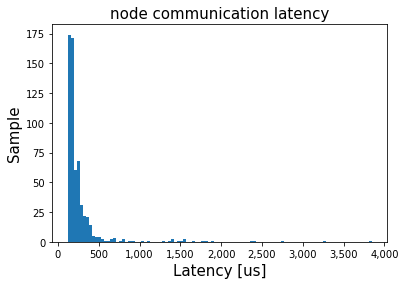

In [19]:
#calculate the ray_ground_classifier com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com9_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com9_latency_ns.append(com)

com9_latency_us = []
for i in com9_latency_ns:
    com9_latency_us.append(i/1000)
print(len(com9_latency_us),max(com9_latency_us),min(com9_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com9_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("ray_ground_classifier_com.pdf")

lgsvl_interface_node 94849078808720
pub: ['rosout', 'parameter_events', 'vehicle/state_report', 'vehicle/odometry', 'lgsvl/vehicle_control_cmd', 'lgsvl/vehicle_state_cmd', 'vehicle/vehicle_kinematic_state', 'gnss/pose', 'tf']
sub: ['parameter_events', 'vehicle/state_command', 'vehicle/vehicle_command', 'lgsvl/gnss_odom', 'lgsvl/state_report', 'lgsvl/vehicle_odom']
94849081234864       1628738367016443241   94849078808720   94849081302592                                   /lgsvl/gnss_odom    10

94849081081456
94849081081680
1645 4544.475 23.552


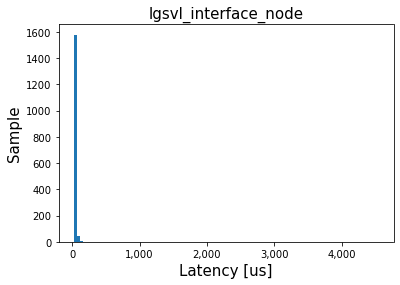

In [20]:
#lgsvl_interface_node:cb duration
path = '/home/saitama1/AVP_e2e/ros2_model.txt'
f = open(path)
#print(type(f))
f.close()

#node handle
with open(path) as f:
        l = f.readlines()
S1 = l.index('Contexts:\n')
E1 = l.index('Publishers:\n')
node = [line for line in l[S1:E1] if n[10] in line]
nodename= node[0].split()[4]
#print(nodename)
nodeh= node[0].split(' ')[0]
print(n[10],nodeh)

#pub topic
S2 = l.index('Publishers:\n')
E2 = l.index('Subscriptions:\n')
pubt = [line for line in l[S2:E2] if nodeh in line]
#print(pubt)
ptopic=[]
for i in pubt:
    ptopic.append(i.split(' /')[1].split()[0])
print('pub:',ptopic)
# print('\n')

#sub topic
S3 = l.index('Subscriptions:\n')
E3 = l.index('Subscription objects:\n')
subt = [line for line in l[S3:E3] if nodeh in line]
#print(subt)
stopic=[]
for i in subt:
    stopic.append(i.split(' /')[1].split()[0])
print('sub:',stopic)

#stopic -> callback handle
#stopic -> subscription_handle
subscription_handle= subt[3].split()[0]
print(subt[3])

#subscription_handle -> reference
S1 = l.index('Subscription objects:\n')
E1 = l.index('Services:\n')   
refer=[]
ref = [line for line in l[S1:E1] if subscription_handle in line]
refer.append(''.join(ref))
reference= refer[0].split()[0]
print(reference)

#reference -> callback_object
S2 = l.index('Callback objects:\n')
E2 = l.index('Callback symbols:\n')   
cboj=[]
cb= [line for line in l[S2:E2] if reference in line]
cboj.append(''.join(cb))
callback_object=cboj[0].split()[2]
print(callback_object)

t=[]
with open(path) as f:
    l = f.readlines()
S3 = l.index('Callback instances:\n')
E3 = l.index('Lifecycle state machines:\n')  
#print(S,E)
l_XXX = [line for line in l[S3:E3] if callback_object in line]

cb10d = []
for i in l_XXX:
    #print(i)
    cb10d.append(int(i.split()[3])) 
cb10d_us = []
for i in cb10d:
    cb10d_us.append(i/1000)
print(len(cb10d_us),max(cb10d_us),min(cb10d_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(cb10d_us, bins=100)
plt.title("lgsvl_interface_node", fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
# plt.xlim(0,3000)
plt.savefig("lgsvl_interface_node.pdf")

0x5643C5C8FF50
1645 6592.787 54.059


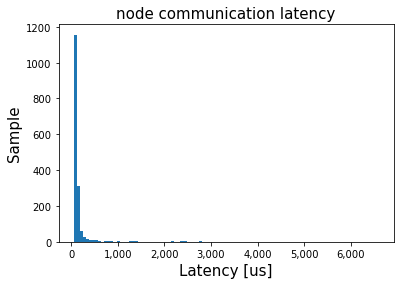

In [21]:
#calculate the ray_ground_classifier com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com10_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com10_latency_ns.append(com)

com10_latency_us = []
for i in com10_latency_ns:
    com10_latency_us.append(i/1000)
print(len(com10_latency_us),max(com10_latency_us),min(com10_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com10_latency_us, bins=100)
plt.title('node communication latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("ray_ground_classifier_com.pdf")

#calculate the lgsvl_interface_node com latency
path = '/home/saitama1/AVP_e2e/rclcpp_subscribe.txt'
f = open(path)
#print(type(f))
f.close()

cb = str(hex(int(callback_object)))
cb = cb.upper().replace('X', 'x')
print(cb)

com10_latency_ns = []
with open(path) as f:
    l = f.readlines()
for i in l:
    #print(i)
    callback = i.split(",")[4].split("= ")[1]
    #print(callback)
    if (callback == cb):
        source = i.split(",")[29].split(" = ")[1]
        #print(source)
        receive = i.split(",")[30].split(" = ")[1]
        #print(receive)
        com = int(receive) - int(source)
        com10_latency_ns.append(com)

com10_latency_us = []
for i in com10_latency_ns:
    com10_latency_us.append(i/1000)
print(len(com10_latency_us),max(com10_latency_us),min(com10_latency_us))

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(com10_latency_us, bins=100)
plt.title('lgsvl_interface_node com latency', fontsize=15)
plt.xlabel("Latency [us]", fontsize=15)
plt.ylabel("Sample", fontsize=15)
plt.savefig("lgsvl_interface_node_com.pdf")

607


Text(0, 0.5, 'Sample')

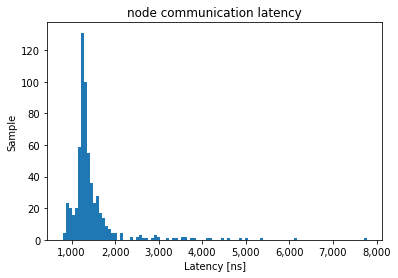

In [22]:
#voxel_grid_cloud_node
P1 = [cb1d_us[i]+com1_latency_us[i] for i in range(min(len(cb1d_us),len(com1_latency_us)))]
print(len(P1))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P1, bins=100)
plt.title('node communication latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

597


Text(0, 0.5, 'Sample')

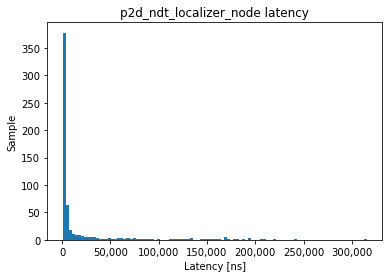

In [23]:
#p2d_ndt_localizer_node
P2 = [cb2d_us[i]+com2_latency_us[i] for i in range(min(len(cb2d_us),len(com2_latency_us)))]
print(len(P2))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P2, bins=100)
plt.title('p2d_ndt_localizer_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

1645


Text(0, 0.5, 'Sample')

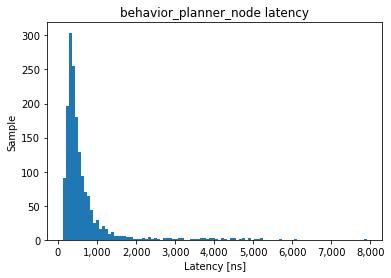

In [24]:
#behavior_planner_node
P3 = [cb3d_us[i]+com3_latency_us[i] for i in range(min(len(cb3d_us),len(com3_latency_us)))]
print(len(P3))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P3, bins=100)
plt.title('behavior_planner_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

1634


Text(0, 0.5, 'Sample')

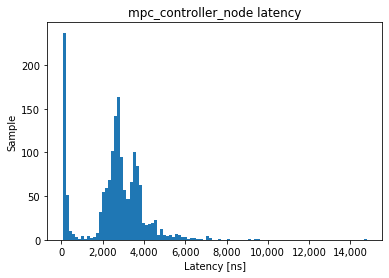

In [25]:
#mpc_controller_node
P4 = [cb4d_us[i]+com4_latency_us[i] for i in range(min(len(cb4d_us),len(com4_latency_us)))]
print(len(P4))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P4, bins=100)
plt.title('mpc_controller_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

1622


Text(0, 0.5, 'Sample')

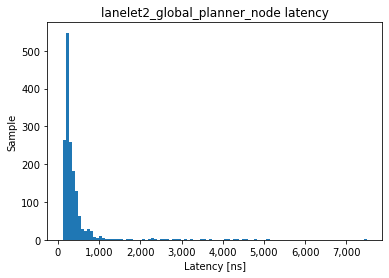

In [26]:
#lanelet2_global_planner_node
P5 = [cb5d_us[i]+com5_latency_us[i] for i in range(min(len(cb5d_us),len(com5_latency_us)))]
print(len(P5))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P5, bins=100)
plt.title('lanelet2_global_planner_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

258


Text(0, 0.5, 'Sample')

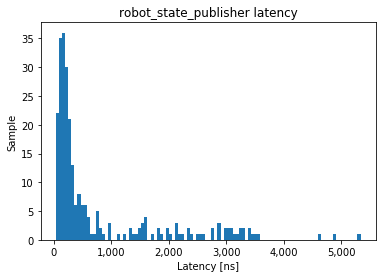

In [27]:
#robot_state_publisher
P6 = [cb6d_us[i]+com6_latency_us[i] for i in range(min(len(cb6d_us),len(com6_latency_us)))]
print(len(P6))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P6, bins=100)
plt.title('robot_state_publisher latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

104


Text(0, 0.5, 'Sample')

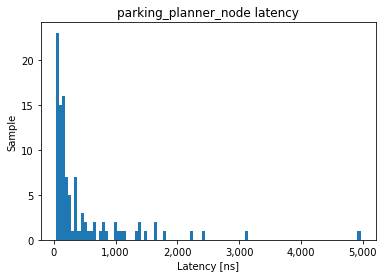

In [28]:
#parking_planner_node
P7 = [cb7d_us[i]+com7_latency_us[i] for i in range(min(len(cb7d_us),len(com7_latency_us)))]
print(len(P7))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P7, bins=100)
plt.title('parking_planner_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

167


Text(0, 0.5, 'Sample')

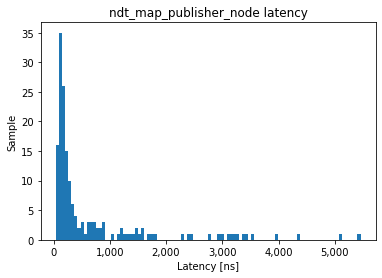

In [29]:
#ndt_map_publisher_node
P8 = [cb8d_us[i]+com8_latency_us[i] for i in range(min(len(cb8d_us),len(com8_latency_us)))]
print(len(P8))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P8, bins=100)
plt.title('ndt_map_publisher_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

607


Text(0, 0.5, 'Sample')

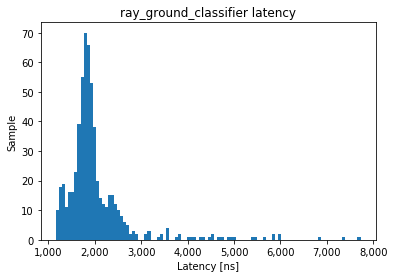

In [30]:
#ray_ground_classifier
P9 = [cb9d_us[i]+com9_latency_us[i] for i in range(min(len(cb9d_us),len(com9_latency_us)))]
print(len(P9))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P9, bins=100)
plt.title('ray_ground_classifier latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

1645


Text(0, 0.5, 'Sample')

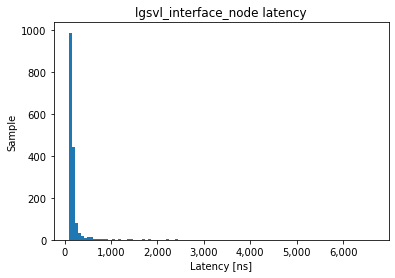

In [31]:
#lgsvl_interface_node
P10 = [cb10d_us[i]+com10_latency_us[i] for i in range(min(len(cb10d_us),len(com10_latency_us)))]
print(len(P10))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P10, bins=100)
plt.title('lgsvl_interface_node latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

597
607 597


Text(0, 0.5, 'Sample')

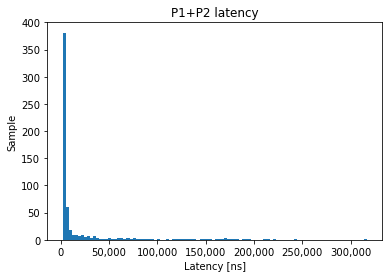

In [32]:
#P12=P1+P2
P12 = [P1[i]+P2[i] for i in range(min(len(P1),len(P2)))]
print(len(P12))
print(len(P1),len(P2))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P12, bins=100)
plt.title('P1+P2 latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

1622
1645 1634 1622 1645


Text(0, 0.5, 'Sample')

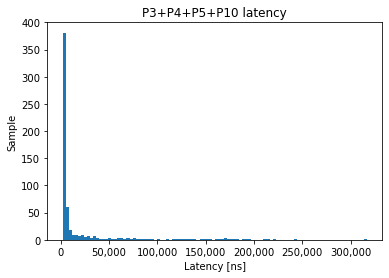

In [33]:
#P34510=P3+P4+P5+P10
P34510 = [P3[i]+P4[i]+P5[i]+P10[i] for i in range(min(len(P3),len(P4),len(P5),len(P10)))]
print(len(P34510))
print(len(P3),len(P4),len(P5),len(P10))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(P12, bins=100)
plt.title('P3+P4+P5+P10 latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
# plt.xlim(0,1200000)

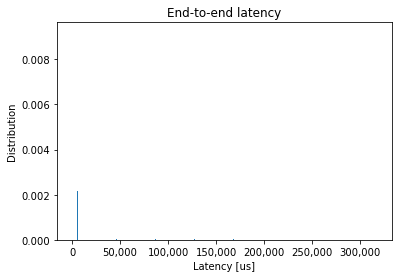

In [97]:
#確率分布の重ね合わせ
import numpy as np
import matplotlib.pyplot as plt
bin=50
x1= np.arange(bin,max(P12)+bin,bin)
#print(x1,len(x1))
x2= np.arange(bin,max(P34510)+bin,bin)
#print(x2,len(x2))
if len(x1) > len(x2):
    x=x1
else:
    x=x2
print('\n')
#P1
p1=[]
for i in x:
    l=0
    for j in P12:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P12)
    p1.append(l)

#P2
p2=[]
for i in x:
    l=0
    for j in P34510:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P34510)
    p2.append(l)

P = [] 
for i in range(len(x)):
    p12 = 0
    for t in range(i):
        p12+= p1[t]*(p2[i-t] + p2[i-t-1])/2.0        
    P.append(p12)
    
P = np.array(P)
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('End-to-end latency')
plt.xlabel('Latency [us]')
plt.ylabel('Distribution')
# plt.plot(x,P,linewidth=1)
# plt.savefig("e2elatency.pdf")

plt.bar(x,P)
plt.savefig("e2ehist.pdf")
#plt.ylim(0,0.002)



6338
6338
6338


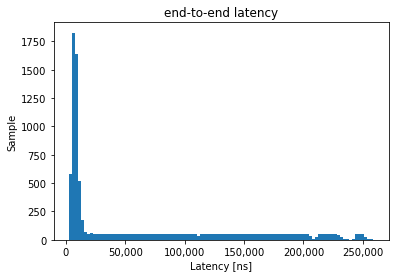

In [64]:
#確率分布の重ね合わせ
import numpy as np
import matplotlib.pyplot as plt
bin=50
x1= np.arange(bin,max(P12)+bin,bin)
#print(x1,len(x1))
x2= np.arange(bin,max(P34510)+bin,bin)
#print(x2,len(x2))
if len(x1) > len(x2):
    x=x1
else:
    x=x2
print('\n')
#P1
p1=[]
for i in x:
    l=0
    for j in P12:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P12)
    p1.append(l)

#P2
p2=[]
for i in x:
    l=0
    for j in P34510:
        if (j < i)&(j > i-bin):
            l+=1
    l/= len(P34510)
    p2.append(l)

P = [] 
for i in range(len(x)):
    p12 = 0
    for t in range(i):
        p12+= p1[t]*(p2[i-t] + p2[i-t-1])/2.0        
    P.append(p12)

print(len(x))
print(len(P))
# fig, ax = plt.subplots(1, 1)
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.title('End-to-end latency')
# plt.xlabel('Latency [us]')
# plt.ylabel('Distribution')
# #plt.xlim(0,200000)
# plt.bar(x,P)
# plt.show()
#print(x,len(x),len(P))
s = [P[i]*len(P) for i in range(len(P))]
#print(len(s),max(s),s)
#print(s)
Px=[]
k=0
for i in s:
    m=(x[k]-bin/2)
    if (i>0)&(i<1):
        Px.append(m)
    else:
        for j in range(int(i)):
            Px.append(m)
    k+=1
print(len(s))
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(Px, bins=100)
plt.title('end-to-end latency')
plt.xlabel('Latency [ns]')
plt.ylabel('Sample')
plt.savefig("e2ehist.pdf")

In [81]:
w=0
print(type(x))
print(len(P))
for i in P:
    if i > 0.00001:
        w+=1
print(w)

h=0
for i in P:
    h+=i
print(h)
print(len(P))

<class 'numpy.ndarray'>
6338
3775
0.9983249581239496
6338


In [55]:
print(x)
print(x[0:3])
n=0
for j in x:
    if j<=100000:
      n+=1
print(n)

[5.0000e+01 1.0000e+02 1.5000e+02 ... 3.1680e+05 3.1685e+05 3.1690e+05]
[ 50. 100. 150.]
2000


In [56]:
sum=0
for k in P[0:n]:
    sum+=k
print(sum)

0.9301635592677747
